In [ ]:
!pip install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.9 MB/s 
     |████████████████████████████████| 209 kB 63.2 MB/s 
     |████████████████████████████████| 81 kB 9.6 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 147 kB 57.2 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 112 kB 59.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4b2c2ef3b394da5c5b3f0ebd936623f5e39c897d679a72cdd26d721eb20295c8
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample

import optuna

import xgboost

from sklearn.metrics import make_scorer , accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold,train_test_split

In [ ]:
df = pd.read_csv('/content/credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [ ]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
df = df.dropna(thresh=2)

In [ ]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
df.drop('Loan ID',axis=1,inplace=True)
df.drop('Customer ID',axis=1,inplace=True)

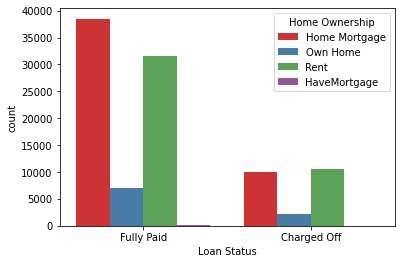

In [ ]:
ax = sns.countplot(x="Loan Status", data=df,hue="Home Ownership",palette="Set1")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


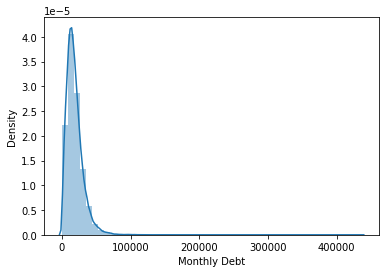

In [ ]:
sns.distplot(df["Monthly Debt"])

In [ ]:
df.drop(df.tail(514).index, inplace=True)

In [ ]:
df['Credit Score']=df['Credit Score'].fillna(pd.Series(np.random.choice(df['Credit Score'].dropna(),size=len(df.index))))
df['Bankruptcies'].fillna(df['Bankruptcies'].std(),inplace=True)
df['Annual Income']=df['Annual Income'].fillna(pd.Series(np.random.choice(df['Annual Income'].dropna(),size=len(df.index))))
df['Tax Liens'].fillna(df['Tax Liens'].std(),inplace=True)
df['Years in current job']=df['Years in current job'].fillna(pd.Series(np.random.choice(df['Years in current job'].dropna(),size=len(df.index))))
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean(),inplace=True)
df['Months since last delinquent']=df['Months since last delinquent'].fillna(pd.Series(np.random.choice(df['Months since last delinquent'].dropna(),size=len(df.index))))

In [ ]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['Term']=label_encoder.fit_transform(df['Term'])
df['Years in current job']=label_encoder.fit_transform(df['Years in current job'])
df['Home Ownership']=label_encoder.fit_transform(df['Home Ownership'])
df['Purpose']=label_encoder.fit_transform(df['Purpose'])
df['Loan Status']=label_encoder.fit_transform(df['Loan Status'])
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412,1,709.0,1167493.0,8,1,5,5214.74,17.2,75.0,6,1,228190,416746.0,1.0,0.0
1,1,262328,1,721.0,1079086.0,1,1,3,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,1,99999999,1,741.0,2231892.0,8,2,3,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,1,347666,0,721.0,806949.0,3,2,3,8741.90,12.0,11.0,9,0,256329,386958.0,0.0,0.0
4,1,176220,1,741.0,1687428.0,5,3,3,20639.70,6.1,62.0,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99481,0,464354,0,7250.0,2337475.0,8,1,3,14984.73,18.5,50.0,15,0,193971,331760.0,0.0,0.0
99482,1,170610,1,721.0,4169968.0,10,3,3,14230.24,8.5,13.0,9,0,127262,192874.0,0.0,0.0
99483,0,369446,1,742.0,1313774.0,2,3,3,28136.72,14.1,38.0,19,0,337288,1365518.0,0.0,0.0
99484,1,342474,1,731.0,1230440.0,1,1,3,5362.56,18.2,38.0,6,1,131480,634370.0,1.0,0.0


In [ ]:
X = df.drop(labels='Loan Status', axis=1).values
y = df['Loan Status'].values
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

**DecisionTreeClassifier**

In [ ]:
%%time
dt =DecisionTreeClassifier(max_features=10 , max_depth=10)
dt.fit(x_train , y_train)
print(dt.score(x_train , y_train))
print(dt.score(x_test , y_test))

0.8211665075136956
0.8135491004121017
CPU times: user 684 ms, sys: 7.98 ms, total: 692 ms
Wall time: 698 ms


In [ ]:
%%time

parameters = {'max_depth':range(1,30), 'max_features':range(1,30)}
scorin_fnc = make_scorer(accuracy_score)
kflod = KFold(n_splits=10)
regressor = DecisionTreeClassifier()

grid = GridSearchCV(regressor,parameters,cv=kflod ,n_jobs=-1 )
grid = grid.fit(x_train,y_train)
reg = grid.best_estimator_
 
print('best score:%f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s:%d'%(key,reg.get_params()[key]))
 
print('test score : %f'%reg.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3770 fits failed out of a total of 8410.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3770 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in

best score:0.812874
best parameters:
max_depth:3
max_features:10
test score : 0.817318
CPU times: user 50.9 s, sys: 6.58 s, total: 57.5 s
Wall time: 28min 50s


In [ ]:
grid.best_score_

0.8128738163333378

**DecisionTreeClassifier**

In [ ]:
%%time
rf = RandomForestClassifier(max_features=15,max_depth=15)
rf.fit(x_train , y_train)
print(rf.score(x_test , y_test))
print(rf.score(x_test , y_test))

0.8184742185144236
0.8184742185144236
CPU times: user 1min 8s, sys: 112 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
# param_dist = {
#         'max_features':range(80,200,4),
#         'max_depth':range(2,15,1)
#         }

rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': np.arange(200,501,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,15),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 6, n_jobs=-1)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_score_

In [ ]:
CV_rfc.best_params_

In [ ]:
CV_rfc.best_estimator_.score(x_test,y_test)

**RandomForestClassifier**

In [ ]:
%%time
Lg = LogisticRegression()
Lg.fit(x_train, y_train)
print(Lg.score(x_train , y_train))
print(Lg.score(x_test , y_test))

0.810612152585817
0.8144537139410996
CPU times: user 2.01 s, sys: 1.36 s, total: 3.37 s
Wall time: 2.59 s


In [ ]:
grid={"C":np.arange(-20,20,0.5), "penalty":["l1","l2","none","elasticnet"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[200]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=6, n_jobs=-1)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

KeyboardInterrupt: ignored

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])

In [ ]:
df_test.dropna(thresh=4)

In [ ]:
df_test.isnull().sum()

In [ ]:
#df_test.drop(df_test.tail(353).index, inplace=True)

In [ ]:
res = Lg.predict(df_test)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_logregr.csv', columns = header)



---



---



In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])


In [ ]:
df_test.dropna(thresh=4)

In [ ]:
df_test.isnull().sum()

In [ ]:
res = dt.predict(df_test)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_dectree.csv', columns = header)



---
XGBoost


In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9,0,621908,1058970,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11,0,679573,904442,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9,0,87058,234410,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8,1,99636,568370,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])


In [ ]:
df_test.dropna(thresh=4)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,611314,1,747.0,2074116.0,1,1,3,42000.83,21.8,38.0,9,0,621908,1058970,0.0,0.0
1,266662,1,734.0,1919190.0,1,1,3,36624.40,19.4,76.0,11,0,679573,904442,0.0,0.0
2,153494,1,709.0,871112.0,2,3,3,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,176242,1,727.0,780083.0,1,3,3,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,321992,1,744.0,1761148.0,1,1,3,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,157806,1,731.0,1514376.0,6,3,3,4795.41,12.5,7.0,9,0,87058,234410,0.0,0.0
9996,132550,1,718.0,763192.0,4,1,3,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,223212,0,700.0,1956050.0,1,3,3,4354.42,27.2,19.0,8,1,99636,568370,1.0,0.0
9998,99999999,1,721.0,972097.0,1,1,3,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test.isnull().sum()

Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [ ]:
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100]}


params = {
        'min_child_weight': [1, 5, 15],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        "max_depth":[1, 1, 12],
        "learning_rate":[0.3, 0.1, 0.03], #range(1,100,1)
        "n_estimators":[100]
        }

In [ ]:
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=params, scoring='roc_auc', n_jobs=-1, cv=6, verbose=3 )
grid.fit(x_train, y_train)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)

y_test = grid.best_estimator_.predict_proba(df_test)
print(y_test)

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
res = xgb.predict(df_test)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_xgboost.csv', columns = header)

**OPTUNA XGBOOST**

In [ ]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', np.arange(0.000,1,0.001)),
        'subsample': trial.suggest_categorical('subsample', np.linspace(0.00,1,200)),
        'learning_rate': trial.suggest_categorical('learning_rate', np.arange(0.000,3.0,0.005) ),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', np.arange(1,20,1)),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgboost.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=1000,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-30 08:01:36,088] A new study created in memory with name: no-name-ec547f2a-545c-4013-b4bf-9a9e1907d145
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  


[08:01:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:02:34,765] Trial 0 finished with value: 0.375533899440383 and parameters: {'lambda': 0.0011160347485726617, 'alpha': 0.3553221991273609, 'colsample_bytree': 0.803, 'subsample': 0.5527638190954774, 'learning_rate': 0.17, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 205}. Best is trial 0 with value: 0.375533899440383.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:02:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:03:10,220] Trial 1 finished with value: 0.39354240599717116 and parameters: {'lambda': 5.01526425897095, 'alpha': 1.8367762990616814, 'colsample_bytree': 0.581, 'subsample': 0.20100502512562815, 'learning_rate': 1.09, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 28}. Best is trial 1 with value: 0.39354240599717116.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserW

[08:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:03:56,397] Trial 2 finished with value: 0.3764793599211419 and parameters: {'lambda': 0.03128762993885615, 'alpha': 0.1593395033889507, 'colsample_bytree': 0.247, 'subsample': 0.457286432160804, 'learning_rate': 0.11, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 221}. Best is trial 1 with value: 0.39354240599717116.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: User

[08:03:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:04:57,548] Trial 3 finished with value: 0.40788003927404454 and parameters: {'lambda': 0.3289764450427898, 'alpha': 0.006269606689796622, 'colsample_bytree': 0.84, 'subsample': 0.8844221105527639, 'learning_rate': 1.75, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 46}. Best is trial 3 with value: 0.40788003927404454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:05:23,332] Trial 4 finished with value: 0.5279827393719182 and parameters: {'lambda': 0.48492218584506946, 'alpha': 0.016117685048321048, 'colsample_bytree': 0.377, 'subsample': 0.7537688442211056, 'learning_rate': 2.12, 'max_depth': 8, 'random_state': 2020, 'min_child_weight': 124}. Best is trial 4 with value: 0.5279827393719182.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:06:01,988] Trial 5 finished with value: 0.37895109546075956 and parameters: {'lambda': 0.05333675456790552, 'alpha': 0.10689059619809133, 'colsample_bytree': 0.792, 'subsample': 0.7135678391959799, 'learning_rate': 1.19, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 292}. Best is trial 4 with value: 0.5279827393719182.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:06:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:06:27,818] Trial 6 finished with value: 0.5865732128977295 and parameters: {'lambda': 0.10830351119247734, 'alpha': 4.830622385371453, 'colsample_bytree': 0.657, 'subsample': 0.5125628140703518, 'learning_rate': 2.36, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 258}. Best is trial 6 with value: 0.5865732128977295.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: User

[08:06:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:07:34,336] Trial 7 finished with value: 0.37884674871365753 and parameters: {'lambda': 0.08897430349782771, 'alpha': 0.6903064099202644, 'colsample_bytree': 0.737, 'subsample': 0.6733668341708543, 'learning_rate': 0.88, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 260}. Best is trial 6 with value: 0.5865732128977295.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:07:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:14:34,889] Trial 8 finished with value: 0.3654880361806796 and parameters: {'lambda': 0.046704740304078306, 'alpha': 0.21710184947883757, 'colsample_bytree': 0.311, 'subsample': 0.9346733668341709, 'learning_rate': 0.055, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 7}. Best is trial 6 with value: 0.5865732128977295.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:14:57,061] Trial 9 finished with value: 0.6857687784446195 and parameters: {'lambda': 0.07449282924721438, 'alpha': 1.1070106670016384, 'colsample_bytree': 0.554, 'subsample': 0.7738693467336684, 'learning_rate': 2.775, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 220}. Best is trial 9 with value: 0.6857687784446195.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:15:18,992] Trial 10 finished with value: 0.6865578750552214 and parameters: {'lambda': 0.004350184054052591, 'alpha': 0.0010709302707614563, 'colsample_bytree': 0.043000000000000003, 'subsample': 0.9246231155778895, 'learning_rate': 2.985, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 147}. Best is trial 10 with value: 0.6865578750552214.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/dist

[08:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:15:51,347] Trial 11 finished with value: 0.3801081295267585 and parameters: {'lambda': 0.0031544813311724386, 'alpha': 0.0014829216258421538, 'colsample_bytree': 0.86, 'subsample': 0.1658291457286432, 'learning_rate': 0.645, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 141}. Best is trial 10 with value: 0.6865578750552214.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:50

[08:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:16:28,449] Trial 12 finished with value: 0.39136802839928997 and parameters: {'lambda': 0.007887796850731424, 'alpha': 0.021657581388301587, 'colsample_bytree': 0.169, 'subsample': 0.3165829145728643, 'learning_rate': 1.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 93}. Best is trial 10 with value: 0.6865578750552214.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[08:16:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:16:53,375] Trial 13 finished with value: 0.7284107559071895 and parameters: {'lambda': 0.008122711634400495, 'alpha': 8.798868861241347, 'colsample_bytree': 0.505, 'subsample': 0.9246231155778895, 'learning_rate': 2.935, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 186}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:17:57,761] Trial 14 finished with value: 0.3851449138623698 and parameters: {'lambda': 0.009378507867995718, 'alpha': 5.600398965702595, 'colsample_bytree': 0.877, 'subsample': 0.8391959798994975, 'learning_rate': 1.43, 'max_depth': 10, 'random_state': 2020, 'min_child_weight': 174}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:18:26,837] Trial 15 finished with value: 0.37690205573951163 and parameters: {'lambda': 0.0013093983331390604, 'alpha': 0.0020940795546445204, 'colsample_bytree': 0.233, 'subsample': 0.7236180904522613, 'learning_rate': 0.585, 'max_depth': 3, 'random_state': 2020, 'min_child_weight': 178}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:

[08:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:19:07,594] Trial 16 finished with value: 0.3906051770201767 and parameters: {'lambda': 0.009581328929016994, 'alpha': 0.041267415168595, 'colsample_bytree': 0.785, 'subsample': 0.11055276381909548, 'learning_rate': 1.1500000000000001, 'max_depth': 14, 'random_state': 2020, 'min_child_weight': 93}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[08:19:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:19:32,763] Trial 17 finished with value: 0.588090484173183 and parameters: {'lambda': 0.004251792067620618, 'alpha': 0.0038735224488137274, 'colsample_bytree': 0.5720000000000001, 'subsample': 0.9246231155778895, 'learning_rate': 2.4, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 108}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[08:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:19:57,574] Trial 18 finished with value: 0.6335315781504023 and parameters: {'lambda': 0.020809520634452124, 'alpha': 0.052787892688265864, 'colsample_bytree': 0.007, 'subsample': 0.9246231155778895, 'learning_rate': 2.735, 'max_depth': 16, 'random_state': 2020, 'min_child_weight': 168}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:50

[08:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:20:09,121] Trial 19 finished with value: 0.5446618568192259 and parameters: {'lambda': 0.002382821711726161, 'alpha': 9.485677129470114, 'colsample_bytree': 0.793, 'subsample': 1.0, 'learning_rate': 2.22, 'max_depth': 1, 'random_state': 2020, 'min_child_weight': 60}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserWarning: Choic

[08:20:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:21:25,294] Trial 20 finished with value: 0.3758272169329412 and parameters: {'lambda': 3.539490410047499, 'alpha': 0.009506394292597026, 'colsample_bytree': 0.926, 'subsample': 0.964824120603015, 'learning_rate': 0.09, 'max_depth': 2, 'random_state': 2020, 'min_child_weight': 146}. Best is trial 13 with value: 0.7284107559071895.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:21:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:21:47,802] Trial 21 finished with value: 0.7330007150866206 and parameters: {'lambda': 0.2675398656343397, 'alpha': 1.2831527149158408, 'colsample_bytree': 0.505, 'subsample': 0.2663316582914573, 'learning_rate': 2.935, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 217}. Best is trial 21 with value: 0.7330007150866206.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:22:34,100] Trial 22 finished with value: 0.40386734062749213 and parameters: {'lambda': 0.4504658508395281, 'alpha': 3.0221620900245916, 'colsample_bytree': 0.666, 'subsample': 0.2663316582914573, 'learning_rate': 1.575, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 198}. Best is trial 21 with value: 0.7330007150866206.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[08:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:22:56,763] Trial 23 finished with value: 0.7360415490417089 and parameters: {'lambda': 1.4465603028985836, 'alpha': 1.189194694782024, 'colsample_bytree': 0.654, 'subsample': 0.6080402010050251, 'learning_rate': 2.935, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 236}. Best is trial 23 with value: 0.7360415490417089.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:23:22,066] Trial 24 finished with value: 0.5655522829803176 and parameters: {'lambda': 2.0262365555539534, 'alpha': 0.5837635879823987, 'colsample_bytree': 0.654, 'subsample': 0.6080402010050251, 'learning_rate': 2.27, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 251}. Best is trial 23 with value: 0.7360415490417089.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:23:45,812] Trial 25 finished with value: 0.6333161576942223 and parameters: {'lambda': 0.9538046625644685, 'alpha': 1.688586874536631, 'colsample_bytree': 0.28, 'subsample': 0.16080402010050251, 'learning_rate': 2.6750000000000003, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 294}. Best is trial 23 with value: 0.7360415490417089.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribution

[08:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:24:09,130] Trial 26 finished with value: 0.7437125076769578 and parameters: {'lambda': 0.207457190970223, 'alpha': 3.0033102491337473, 'colsample_bytree': 0.519, 'subsample': 0.48743718592964824, 'learning_rate': 2.965, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 237}. Best is trial 26 with value: 0.7437125076769578.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:24:32,377] Trial 27 finished with value: 0.7478539596012502 and parameters: {'lambda': 0.272477688813096, 'alpha': 2.686285556301285, 'colsample_bytree': 0.41300000000000003, 'subsample': 0.2663316582914573, 'learning_rate': 2.965, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 237}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributio

[08:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:25:01,667] Trial 28 finished with value: 0.5179403819683989 and parameters: {'lambda': 1.3434733462474802, 'alpha': 2.560439655749155, 'colsample_bytree': 0.707, 'subsample': 0.5477386934673367, 'learning_rate': 2.045, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 244}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:25:39,580] Trial 29 finished with value: 0.4245745414586452 and parameters: {'lambda': 9.523799414145763, 'alpha': 0.3484364413498148, 'colsample_bytree': 0.417, 'subsample': 0.22110552763819097, 'learning_rate': 1.79, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 280}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:26:04,505] Trial 30 finished with value: 0.5609434979990138 and parameters: {'lambda': 0.22557784018746907, 'alpha': 0.6444437355164133, 'colsample_bytree': 0.249, 'subsample': 0.5226130653266332, 'learning_rate': 2.35, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 236}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:26:56,798] Trial 31 finished with value: 0.39848563391998265 and parameters: {'lambda': 0.16386316927394198, 'alpha': 1.1820580976866395, 'colsample_bytree': 0.519, 'subsample': 0.5829145728643216, 'learning_rate': 1.545, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 215}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[08:26:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:27:19,743] Trial 32 finished with value: 0.6797961904541516 and parameters: {'lambda': 0.8155834957892886, 'alpha': 3.970376647767797, 'colsample_bytree': 0.116, 'subsample': 0.48743718592964824, 'learning_rate': 2.965, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 274}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:27:42,489] Trial 33 finished with value: 0.7141314003864868 and parameters: {'lambda': 0.20923240729314657, 'alpha': 1.8597089672141605, 'colsample_bytree': 0.897, 'subsample': 0.07537688442211056, 'learning_rate': 2.8000000000000003, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 202}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribu

[08:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:28:06,995] Trial 34 finished with value: 0.570698169542505 and parameters: {'lambda': 2.4628870314690072, 'alpha': 1.096320192437017, 'colsample_bytree': 0.372, 'subsample': 0.2663316582914573, 'learning_rate': 2.355, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 228}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:29:17,543] Trial 35 finished with value: 0.40421723424709016 and parameters: {'lambda': 0.5832424742460902, 'alpha': 0.4499397910239269, 'colsample_bytree': 0.908, 'subsample': 0.7889447236180904, 'learning_rate': 1.675, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 270}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[08:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:29:39,738] Trial 36 finished with value: 0.6979306108836821 and parameters: {'lambda': 0.3466998367433927, 'alpha': 0.2629058690143029, 'colsample_bytree': 0.34400000000000003, 'subsample': 0.6482412060301508, 'learning_rate': 2.965, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 235}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[08:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:30:00,797] Trial 37 finished with value: 0.5920930169716764 and parameters: {'lambda': 0.12796915314996968, 'alpha': 2.3600969623390786, 'colsample_bytree': 0.297, 'subsample': 0.135678391959799, 'learning_rate': 2.43, 'max_depth': 8, 'random_state': 2020, 'min_child_weight': 208}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:30:52,956] Trial 38 finished with value: 0.3782180375318293 and parameters: {'lambda': 0.3060823870681454, 'alpha': 6.041538419198839, 'colsample_bytree': 0.492, 'subsample': 0.864321608040201, 'learning_rate': 0.73, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 197}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserW

[08:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:31:28,924] Trial 39 finished with value: 0.389158350894502 and parameters: {'lambda': 0.02336843509386777, 'alpha': 0.10339093978282408, 'colsample_bytree': 0.219, 'subsample': 0.1708542713567839, 'learning_rate': 0.62, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 251}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:32:01,660] Trial 40 finished with value: 0.41731561742080636 and parameters: {'lambda': 1.2714791240919856, 'alpha': 0.9271736395090928, 'colsample_bytree': 0.41300000000000003, 'subsample': 0.3316582914572864, 'learning_rate': 1.825, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 163}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[08:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:33:59,402] Trial 41 finished with value: 0.3747016782559308 and parameters: {'lambda': 0.051619470146917805, 'alpha': 9.688108681968288, 'colsample_bytree': 0.505, 'subsample': 0.25125628140703515, 'learning_rate': 0.01, 'max_depth': 10, 'random_state': 2020, 'min_child_weight': 187}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[08:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:34:21,798] Trial 42 finished with value: 0.6886026301397894 and parameters: {'lambda': 0.6381578229988395, 'alpha': 4.287697499066827, 'colsample_bytree': 0.835, 'subsample': 0.6834170854271356, 'learning_rate': 2.745, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 222}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:34:53,438] Trial 43 finished with value: 0.4516117679531858 and parameters: {'lambda': 0.03377385588309704, 'alpha': 8.019643036325327, 'colsample_bytree': 0.535, 'subsample': 0.23618090452261306, 'learning_rate': 1.885, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 186}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:35:24,130] Trial 44 finished with value: 0.3844517313862282 and parameters: {'lambda': 0.13997215308091088, 'alpha': 3.362146821622807, 'colsample_bytree': 0.504, 'subsample': 0.7939698492462312, 'learning_rate': 1.685, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 263}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:35:44,734] Trial 45 finished with value: 0.6378416050202244 and parameters: {'lambda': 0.09754554113994048, 'alpha': 1.524810394115422, 'colsample_bytree': 0.129, 'subsample': 0.06030150753768844, 'learning_rate': 2.695, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 240}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:36:07,169] Trial 46 finished with value: 0.5165928574248814 and parameters: {'lambda': 0.07016980860924868, 'alpha': 4.371505380906571, 'colsample_bytree': 0.505, 'subsample': 0.8190954773869347, 'learning_rate': 2.085, 'max_depth': 3, 'random_state': 2020, 'min_child_weight': 217}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:36:31,340] Trial 47 finished with value: 0.3819980680311606 and parameters: {'lambda': 0.2984991601710145, 'alpha': 6.458138310346421, 'colsample_bytree': 0.893, 'subsample': 0.271356783919598, 'learning_rate': 1.5250000000000001, 'max_depth': 2, 'random_state': 2020, 'min_child_weight': 287}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions

[08:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:37:33,998] Trial 48 finished with value: 0.4247980383239904 and parameters: {'lambda': 6.291064823399311, 'alpha': 2.1669935511273617, 'colsample_bytree': 0.97, 'subsample': 0.49748743718592964, 'learning_rate': 1.705, 'max_depth': 14, 'random_state': 2020, 'min_child_weight': 129}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:38:42,616] Trial 49 finished with value: 0.47916056259029133 and parameters: {'lambda': 0.0010184464054938383, 'alpha': 0.1529720444137282, 'colsample_bytree': 0.419, 'subsample': 0.8492462311557789, 'learning_rate': 1.93, 'max_depth': 16, 'random_state': 2020, 'min_child_weight': 226}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502

[08:38:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:39:22,263] Trial 50 finished with value: 0.3770122213265697 and parameters: {'lambda': 1.8086294886551126, 'alpha': 0.8426666081348324, 'colsample_bytree': 0.223, 'subsample': 0.6582914572864321, 'learning_rate': 0.21, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 186}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:40:17,096] Trial 51 finished with value: 0.3764440210339037 and parameters: {'lambda': 0.19514626953348674, 'alpha': 1.570150625272693, 'colsample_bytree': 0.353, 'subsample': 0.9748743718592965, 'learning_rate': 0.15, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 202}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:41:34,773] Trial 52 finished with value: 0.38456053420658043 and parameters: {'lambda': 0.22487349701030931, 'alpha': 2.9174325428609746, 'colsample_bytree': 0.733, 'subsample': 0.9296482412060302, 'learning_rate': 1.165, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 160}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[08:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:42:04,698] Trial 53 finished with value: 0.39560528666121464 and parameters: {'lambda': 0.40624185438718746, 'alpha': 1.63092025845603, 'colsample_bytree': 0.151, 'subsample': 0.11557788944723618, 'learning_rate': 0.9500000000000001, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 206}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[08:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:42:45,235] Trial 54 finished with value: 0.4117002450806265 and parameters: {'lambda': 0.0966091164988636, 'alpha': 6.006575607391937, 'colsample_bytree': 0.214, 'subsample': 0.3768844221105528, 'learning_rate': 1.32, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 252}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:43:10,908] Trial 55 finished with value: 0.3779030948648746 and parameters: {'lambda': 0.01676885350548515, 'alpha': 0.5383833619240632, 'colsample_bytree': 0.644, 'subsample': 0.9899497487437187, 'learning_rate': 1.58, 'max_depth': 1, 'random_state': 2020, 'min_child_weight': 213}. Best is trial 27 with value: 0.7478539596012502.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:43:33,301] Trial 56 finished with value: 0.752905731037471 and parameters: {'lambda': 0.8457149618800933, 'alpha': 2.0562165384395272, 'colsample_bytree': 0.911, 'subsample': 0.4170854271356784, 'learning_rate': 2.935, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 194}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:44:02,564] Trial 57 finished with value: 0.4153446809811198 and parameters: {'lambda': 0.8043521894282714, 'alpha': 2.9663596609878446, 'colsample_bytree': 0.558, 'subsample': 0.005025125628140704, 'learning_rate': 0.18, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 173}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:44:24,417] Trial 58 finished with value: 0.6696392460881315 and parameters: {'lambda': 1.2755107769758753, 'alpha': 0.33813311494612985, 'colsample_bytree': 0.063, 'subsample': 0.9045226130653267, 'learning_rate': 2.9050000000000002, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 239}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributi

[08:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:45:05,605] Trial 59 finished with value: 0.4213255659217887 and parameters: {'lambda': 0.5383989827024227, 'alpha': 1.1562626382609507, 'colsample_bytree': 0.224, 'subsample': 0.33668341708542715, 'learning_rate': 1.385, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 192}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:45:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:46:10,837] Trial 60 finished with value: 0.3810987332336446 and parameters: {'lambda': 2.317456230520754, 'alpha': 0.770203553982786, 'colsample_bytree': 0.9550000000000001, 'subsample': 0.5376884422110553, 'learning_rate': 0.935, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 157}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions

[08:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:46:31,680] Trial 61 finished with value: 0.740871408908759 and parameters: {'lambda': 0.2496311438131434, 'alpha': 1.992269991072447, 'colsample_bytree': 0.545, 'subsample': 0.07537688442211056, 'learning_rate': 2.935, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 228}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:46:56,987] Trial 62 finished with value: 0.390847501064244 and parameters: {'lambda': 3.441224013644001, 'alpha': 2.2064568397804734, 'colsample_bytree': 0.858, 'subsample': 0.035175879396984924, 'learning_rate': 0.36, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 233}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:47:19,206] Trial 63 finished with value: 0.5412837036682365 and parameters: {'lambda': 0.07409687447371215, 'alpha': 3.4174461336044692, 'colsample_bytree': 0.637, 'subsample': 0.4170854271356784, 'learning_rate': 2.1750000000000003, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 262}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributio

[08:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:48:21,833] Trial 64 finished with value: 0.40167987031063435 and parameters: {'lambda': 0.2701226468031803, 'alpha': 6.95136361499697, 'colsample_bytree': 0.371, 'subsample': 0.7989949748743719, 'learning_rate': 0.995, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 219}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:48:54,305] Trial 65 finished with value: 0.39203808750287145 and parameters: {'lambda': 0.4090105431584878, 'alpha': 4.605991894863175, 'colsample_bytree': 0.262, 'subsample': 0.1457286432160804, 'learning_rate': 0.8200000000000001, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 248}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributio

[08:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:49:33,303] Trial 66 finished with value: 0.3831683197790767 and parameters: {'lambda': 0.14977604187524307, 'alpha': 1.2949884819958644, 'colsample_bytree': 0.716, 'subsample': 0.49246231155778897, 'learning_rate': 1.3800000000000001, 'max_depth': 8, 'random_state': 2020, 'min_child_weight': 228}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributi

[08:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:49:59,200] Trial 67 finished with value: 0.5386084016564048 and parameters: {'lambda': 0.8024702534718862, 'alpha': 2.0109178343568566, 'colsample_bytree': 0.96, 'subsample': 0.6080402010050251, 'learning_rate': 2.145, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 181}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: User

[08:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:50:20,660] Trial 68 finished with value: 0.5954038196431592 and parameters: {'lambda': 0.002081056365938561, 'alpha': 5.245982119453311, 'colsample_bytree': 0.255, 'subsample': 0.2663316582914573, 'learning_rate': 2.49, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 210}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:50:42,479] Trial 69 finished with value: 0.5546965072231842 and parameters: {'lambda': 0.005495845277316348, 'alpha': 0.4452474390606523, 'colsample_bytree': 0.294, 'subsample': 0.35678391959798994, 'learning_rate': 2.305, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 260}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[08:50:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:52:20,160] Trial 70 finished with value: 0.38650007933019753 and parameters: {'lambda': 0.036146044279877824, 'alpha': 0.03195007474754447, 'colsample_bytree': 0.911, 'subsample': 0.6331658291457286, 'learning_rate': 0.525, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 24}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[08:52:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:52:42,455] Trial 71 finished with value: 0.5844735726472632 and parameters: {'lambda': 0.18359978621086015, 'alpha': 0.9497500888861421, 'colsample_bytree': 0.654, 'subsample': 0.4623115577889447, 'learning_rate': 2.34, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 200}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:52:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:53:03,025] Trial 72 finished with value: 0.6898402407829429 and parameters: {'lambda': 0.1185141405995085, 'alpha': 1.9496459537505388, 'colsample_bytree': 0.061, 'subsample': 0.07537688442211056, 'learning_rate': 2.935, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 195}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[08:53:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:53:23,773] Trial 73 finished with value: 0.7321102441460013 and parameters: {'lambda': 0.24183811130854488, 'alpha': 2.5959093870905514, 'colsample_bytree': 0.897, 'subsample': 0.07537688442211056, 'learning_rate': 2.88, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 232}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:53:45,425] Trial 74 finished with value: 0.7328596058001485 and parameters: {'lambda': 1.0204264442533546, 'alpha': 3.5723109868675498, 'colsample_bytree': 0.398, 'subsample': 0.32160804020100503, 'learning_rate': 2.935, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 243}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:54:19,340] Trial 75 finished with value: 0.384388973704923 and parameters: {'lambda': 1.0180175307227874, 'alpha': 2.7295544398034663, 'colsample_bytree': 0.677, 'subsample': 0.32160804020100503, 'learning_rate': 1.425, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 270}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:54:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:54:52,015] Trial 76 finished with value: 0.3903492766838447 and parameters: {'lambda': 1.6691218141360127, 'alpha': 3.6590523167393694, 'colsample_bytree': 0.272, 'subsample': 0.2964824120603015, 'learning_rate': 1.0150000000000001, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 244}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribution

[08:54:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:55:29,680] Trial 77 finished with value: 0.38360901733630653 and parameters: {'lambda': 0.6477784384634282, 'alpha': 0.07297897821735273, 'colsample_bytree': 0.20600000000000002, 'subsample': 0.7487437185929648, 'learning_rate': 0.9450000000000001, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 231}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/opt

[08:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:56:05,040] Trial 78 finished with value: 0.375981852792113 and parameters: {'lambda': 0.471915380945866, 'alpha': 1.3962423444281589, 'colsample_bytree': 0.23600000000000002, 'subsample': 0.6683417085427136, 'learning_rate': 0.185, 'max_depth': 3, 'random_state': 2020, 'min_child_weight': 253}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions

[08:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:56:48,564] Trial 79 finished with value: 0.378295269350702 and parameters: {'lambda': 0.2614684899399619, 'alpha': 2.3555223364263917, 'colsample_bytree': 0.562, 'subsample': 0.5025125628140703, 'learning_rate': 0.5700000000000001, 'max_depth': 10, 'random_state': 2020, 'min_child_weight': 222}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribution

[08:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:57:11,414] Trial 80 finished with value: 0.5190086018250921 and parameters: {'lambda': 3.6521538248770185, 'alpha': 0.009785443892003611, 'colsample_bytree': 0.0, 'subsample': 0.48743718592964824, 'learning_rate': 2.125, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 241}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:57:46,854] Trial 81 finished with value: 0.37821463793485555 and parameters: {'lambda': 0.349255948789739, 'alpha': 8.861675476119022, 'colsample_bytree': 0.531, 'subsample': 0.3919597989949749, 'learning_rate': 0.4, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 216}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserWa

[08:57:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:58:08,845] Trial 82 finished with value: 0.7209766219536525 and parameters: {'lambda': 0.9948438510579602, 'alpha': 3.9882172446838178, 'colsample_bytree': 0.545, 'subsample': 0.34673366834170855, 'learning_rate': 2.88, 'max_depth': 14, 'random_state': 2020, 'min_child_weight': 279}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[08:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:58:35,114] Trial 83 finished with value: 0.38204398021122943 and parameters: {'lambda': 0.6623597376546464, 'alpha': 7.647214641287217, 'colsample_bytree': 0.587, 'subsample': 0.05025125628140704, 'learning_rate': 0.78, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 235}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:58:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:59:12,401] Trial 84 finished with value: 0.3949132877593619 and parameters: {'lambda': 0.16163422288542698, 'alpha': 5.0974580714534765, 'colsample_bytree': 0.81, 'subsample': 0.20603015075376885, 'learning_rate': 1.5, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 226}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[08:59:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 08:59:34,932] Trial 85 finished with value: 0.7351341281021821 and parameters: {'lambda': 0.3603097734450338, 'alpha': 2.878382722915849, 'colsample_bytree': 0.98, 'subsample': 0.9849246231155779, 'learning_rate': 2.935, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 207}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserW

[08:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:00:06,613] Trial 86 finished with value: 0.37611062356637726 and parameters: {'lambda': 0.3858061016239981, 'alpha': 2.5870994395913924, 'colsample_bytree': 0.5730000000000001, 'subsample': 0.9849246231155779, 'learning_rate': 0.58, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 256}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribution

[09:00:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:00:27,340] Trial 87 finished with value: 0.7392083061319576 and parameters: {'lambda': 0.2483622704606074, 'alpha': 1.0007255433985136, 'colsample_bytree': 0.854, 'subsample': 0.06532663316582915, 'learning_rate': 2.935, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 209}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[09:00:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:00:52,237] Trial 88 finished with value: 0.37903511634438275 and parameters: {'lambda': 0.5018204991166709, 'alpha': 1.015587219716388, 'colsample_bytree': 0.683, 'subsample': 0.06532663316582915, 'learning_rate': 0.495, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 210}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[09:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:01:14,481] Trial 89 finished with value: 0.7241971030206421 and parameters: {'lambda': 0.2858732459530965, 'alpha': 0.6849911476037353, 'colsample_bytree': 0.514, 'subsample': 0.7085427135678392, 'learning_rate': 2.935, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 246}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[09:01:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:01:36,935] Trial 90 finished with value: 0.7357090484133304 and parameters: {'lambda': 1.4936308885150515, 'alpha': 1.3269999083506643, 'colsample_bytree': 0.854, 'subsample': 0.628140703517588, 'learning_rate': 2.935, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 67}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserW

[09:01:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:02:04,259] Trial 91 finished with value: 0.3850303197377732 and parameters: {'lambda': 1.3577620598382951, 'alpha': 1.370310606522742, 'colsample_bytree': 0.47600000000000003, 'subsample': 0.45226130653266333, 'learning_rate': 1.56, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 49}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions

[09:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:02:26,775] Trial 92 finished with value: 0.735594668599866 and parameters: {'lambda': 1.5657114867087136, 'alpha': 1.8084734003362675, 'colsample_bytree': 0.8160000000000001, 'subsample': 0.628140703517588, 'learning_rate': 2.935, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 124}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.

[09:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:02:58,096] Trial 93 finished with value: 0.39808311157498594 and parameters: {'lambda': 3.0234752990392004, 'alpha': 1.7615151858062572, 'colsample_bytree': 0.519, 'subsample': 0.7688442211055276, 'learning_rate': 1.9000000000000001, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 85}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribution

[09:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:03:31,636] Trial 94 finished with value: 0.3758964366905176 and parameters: {'lambda': 1.5733311241211312, 'alpha': 1.2042518915762142, 'colsample_bytree': 0.218, 'subsample': 0.7638190954773869, 'learning_rate': 0.22, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 113}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: User

[09:03:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:03:52,955] Trial 95 finished with value: 0.6479994962906016 and parameters: {'lambda': 5.06126685595938, 'alpha': 0.8003405369432247, 'colsample_bytree': 0.98, 'subsample': 0.12060301507537688, 'learning_rate': 2.57, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 129}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserWa

[09:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:04:23,906] Trial 96 finished with value: 0.3788349642764998 and parameters: {'lambda': 2.0295149593944593, 'alpha': 1.7633522765023353, 'colsample_bytree': 0.991, 'subsample': 0.8542713567839196, 'learning_rate': 1.2750000000000001, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 78}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions

[09:04:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:04:46,673] Trial 97 finished with value: 0.5052597630192992 and parameters: {'lambda': 0.19037174132872325, 'alpha': 0.4793744425805349, 'colsample_bytree': 0.077, 'subsample': 0.7035175879396985, 'learning_rate': 2.0300000000000002, 'max_depth': 16, 'random_state': 2020, 'min_child_weight': 30}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributio

[09:04:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:05:28,808] Trial 98 finished with value: 0.4124133649865175 and parameters: {'lambda': 0.69850000282549, 'alpha': 0.6093718804038004, 'colsample_bytree': 0.431, 'subsample': 0.2562814070351759, 'learning_rate': 1.6, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 145}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserWa

[09:05:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:05:53,571] Trial 99 finished with value: 0.37892973776349126 and parameters: {'lambda': 0.33873434010123576, 'alpha': 1.4442851271073565, 'colsample_bytree': 0.122, 'subsample': 0.36683417085427134, 'learning_rate': 1.45, 'max_depth': 1, 'random_state': 2020, 'min_child_weight': 67}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[09:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:06:15,907] Trial 100 finished with value: 0.6748069762202057 and parameters: {'lambda': 0.12149076368076211, 'alpha': 1.0242374127094958, 'colsample_bytree': 0.303, 'subsample': 0.628140703517588, 'learning_rate': 2.935, 'max_depth': 2, 'random_state': 2020, 'min_child_weight': 138}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[09:06:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:06:38,238] Trial 101 finished with value: 0.6730041805214326 and parameters: {'lambda': 0.9455078905816452, 'alpha': 3.0039321975845796, 'colsample_bytree': 0.07, 'subsample': 0.628140703517588, 'learning_rate': 2.935, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 102}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[09:06:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:07:32,417] Trial 102 finished with value: 0.37848002852187684 and parameters: {'lambda': 1.2583394984727074, 'alpha': 2.092556989752903, 'colsample_bytree': 0.4, 'subsample': 0.9447236180904522, 'learning_rate': 0.5, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 222}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: UserW

[09:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:08:35,676] Trial 103 finished with value: 0.37858218935391424 and parameters: {'lambda': 1.1226250757767955, 'alpha': 3.4482410987891394, 'colsample_bytree': 0.9390000000000001, 'subsample': 0.6884422110552764, 'learning_rate': 0.6, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 205}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributio

[09:08:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:08:58,053] Trial 104 finished with value: 0.749551508139451 and parameters: {'lambda': 2.5685378506991516, 'alpha': 1.7050926486151496, 'colsample_bytree': 0.389, 'subsample': 0.23115577889447236, 'learning_rate': 2.96, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 169}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[09:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:09:46,243] Trial 105 finished with value: 0.37889148945292433 and parameters: {'lambda': 2.448527032571719, 'alpha': 1.6840214921567163, 'colsample_bytree': 0.8160000000000001, 'subsample': 0.47738693467336685, 'learning_rate': 0.595, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 178}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[09:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:10:43,905] Trial 106 finished with value: 0.37971917475908634 and parameters: {'lambda': 0.5387351577334009, 'alpha': 0.8065216877439484, 'colsample_bytree': 0.6980000000000001, 'subsample': 0.9798994974874372, 'learning_rate': 1.025, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 168}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[09:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:11:44,604] Trial 107 finished with value: 0.39264217928777073 and parameters: {'lambda': 2.99696655216953, 'alpha': 2.3309210458805474, 'colsample_bytree': 0.579, 'subsample': 0.577889447236181, 'learning_rate': 1.285, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 187}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Use

[09:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:12:07,593] Trial 108 finished with value: 0.6074545155291151 and parameters: {'lambda': 0.22082916184159535, 'alpha': 1.2130618910658306, 'colsample_bytree': 0.854, 'subsample': 0.6130653266331658, 'learning_rate': 2.4050000000000002, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 153}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[09:12:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:12:35,341] Trial 109 finished with value: 0.37788212118452796 and parameters: {'lambda': 0.4289183809241005, 'alpha': 0.2466057009549305, 'colsample_bytree': 0.898, 'subsample': 0.30150753768844224, 'learning_rate': 0.745, 'max_depth': 4, 'random_state': 2020, 'min_child_weight': 193}. Best is trial 56 with value: 0.752905731037471.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:12:56,526] Trial 110 finished with value: 0.7572670429047568 and parameters: {'lambda': 4.606333333734059, 'alpha': 1.464636414883749, 'colsample_bytree': 0.424, 'subsample': 0.12562814070351758, 'learning_rate': 2.96, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 171}. Best is trial 110 with value: 0.7572670429047568.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[09:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:13:17,798] Trial 111 finished with value: 0.7639307239820454 and parameters: {'lambda': 4.8389913544141905, 'alpha': 1.9353187680633797, 'colsample_bytree': 0.713, 'subsample': 0.12562814070351758, 'learning_rate': 2.965, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 171}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502

[09:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:13:50,765] Trial 112 finished with value: 0.39092868770665185 and parameters: {'lambda': 7.2321240442879535, 'alpha': 1.9375987657873255, 'colsample_bytree': 0.47900000000000004, 'subsample': 0.12562814070351758, 'learning_rate': 1.18, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 166}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distri

[09:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:14:12,417] Trial 113 finished with value: 0.7604867220697269 and parameters: {'lambda': 4.581691972462697, 'alpha': 1.4414703385234915, 'colsample_bytree': 0.463, 'subsample': 0.22613065326633167, 'learning_rate': 2.995, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 175}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[09:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:14:34,712] Trial 114 finished with value: 0.7047116313066876 and parameters: {'lambda': 4.516683856785442, 'alpha': 1.4707813898562516, 'colsample_bytree': 0.368, 'subsample': 0.23115577889447236, 'learning_rate': 2.965, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 174}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[09:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:14:57,539] Trial 115 finished with value: 0.7631688158930952 and parameters: {'lambda': 9.850879843164343, 'alpha': 1.0578442837574538, 'colsample_bytree': 0.777, 'subsample': 0.7286432160804021, 'learning_rate': 2.965, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 171}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:14:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:15:59,247] Trial 116 finished with value: 0.39839218083627825 and parameters: {'lambda': 9.34809135397212, 'alpha': 0.9619629252156442, 'colsample_bytree': 0.097, 'subsample': 0.22613065326633167, 'learning_rate': 1.415, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 169}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[09:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:17:08,112] Trial 117 finished with value: 0.378544958420703 and parameters: {'lambda': 6.151539540894738, 'alpha': 0.14264499181312432, 'colsample_bytree': 0.672, 'subsample': 0.8442211055276382, 'learning_rate': 0.485, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 182}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:17:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:18:02,775] Trial 118 finished with value: 0.3846495044102232 and parameters: {'lambda': 4.252648240645424, 'alpha': 0.6999711645588498, 'colsample_bytree': 0.127, 'subsample': 0.7286432160804021, 'learning_rate': 0.535, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 156}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:18:24,080] Trial 119 finished with value: 0.752959651429931 and parameters: {'lambda': 8.045727491885929, 'alpha': 1.0218818065507635, 'colsample_bytree': 0.424, 'subsample': 0.12562814070351758, 'learning_rate': 2.945, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 177}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:18:57,726] Trial 120 finished with value: 0.39201528299146443 and parameters: {'lambda': 7.503388165703908, 'alpha': 0.0031582201307662804, 'colsample_bytree': 0.5660000000000001, 'subsample': 0.12562814070351758, 'learning_rate': 1.21, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 174}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distr

[09:18:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:19:54,310] Trial 121 finished with value: 0.3815431614036046 and parameters: {'lambda': 5.5013773336607015, 'alpha': 1.2428083918911315, 'colsample_bytree': 0.41300000000000003, 'subsample': 0.5728643216080402, 'learning_rate': 0.42, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 159}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribu

[09:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:20:16,782] Trial 122 finished with value: 0.6859622613603348 and parameters: {'lambda': 8.841564597613687, 'alpha': 0.8923979965143886, 'colsample_bytree': 0.183, 'subsample': 0.4723618090452261, 'learning_rate': 2.965, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 190}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:21:17,206] Trial 123 finished with value: 0.3882239506208078 and parameters: {'lambda': 4.162005305134618, 'alpha': 1.5232666768441163, 'colsample_bytree': 0.487, 'subsample': 0.592964824120603, 'learning_rate': 1.12, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 163}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[09:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:22:38,911] Trial 124 finished with value: 0.482774764616911 and parameters: {'lambda': 3.0212739268658098, 'alpha': 0.5363159921101984, 'colsample_bytree': 0.463, 'subsample': 0.9949748743718593, 'learning_rate': 1.915, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 148}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:23:01,951] Trial 125 finished with value: 0.723308185388013 and parameters: {'lambda': 7.403166947777534, 'alpha': 2.3474587313536404, 'colsample_bytree': 0.879, 'subsample': 0.4221105527638191, 'learning_rate': 2.7800000000000002, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions

[09:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:23:45,987] Trial 126 finished with value: 0.3757821722797302 and parameters: {'lambda': 5.90822990095773, 'alpha': 0.36897646782791305, 'colsample_bytree': 0.336, 'subsample': 0.8341708542713568, 'learning_rate': 0.17500000000000002, 'max_depth': 8, 'random_state': 2020, 'min_child_weight': 184}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distribut

[09:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:24:07,944] Trial 127 finished with value: 0.7426122411370398 and parameters: {'lambda': 2.0410004837814695, 'alpha': 1.0983829297260177, 'colsample_bytree': 0.543, 'subsample': 0.2914572864321608, 'learning_rate': 2.97, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 197}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[09:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:24:39,660] Trial 128 finished with value: 0.3794410257393725 and parameters: {'lambda': 3.4675372549254777, 'alpha': 1.0428903766282616, 'colsample_bytree': 0.731, 'subsample': 0.3065326633165829, 'learning_rate': 0.97, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 175}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[09:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:25:12,420] Trial 129 finished with value: 0.3863962899749361 and parameters: {'lambda': 1.9758583707958168, 'alpha': 2.0624591870554063, 'colsample_bytree': 0.777, 'subsample': 0.507537688442211, 'learning_rate': 1.725, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 199}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[09:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:25:33,430] Trial 130 finished with value: 0.5776839757981141 and parameters: {'lambda': 4.8032848058038855, 'alpha': 0.7293516282493213, 'colsample_bytree': 0.28500000000000003, 'subsample': 0.08040201005025126, 'learning_rate': 2.37, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 181}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distrib

[09:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:26:01,562] Trial 131 finished with value: 0.386623838378362 and parameters: {'lambda': 2.4702624244978657, 'alpha': 1.1462367827680096, 'colsample_bytree': 0.756, 'subsample': 0.1407035175879397, 'learning_rate': 1.465, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 168}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[09:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:26:25,268] Trial 132 finished with value: 0.703924943064928 and parameters: {'lambda': 8.248948630611302, 'alpha': 1.5544285087143743, 'colsample_bytree': 0.854, 'subsample': 0.9396984924623115, 'learning_rate': 2.7600000000000002, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 193}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributi

[09:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:26:47,837] Trial 133 finished with value: 0.6913869976199944 and parameters: {'lambda': 6.589675214825463, 'alpha': 1.3299374065868017, 'colsample_bytree': 0.423, 'subsample': 0.678391959798995, 'learning_rate': 2.77, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 198}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: Us

[09:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:27:09,723] Trial 134 finished with value: 0.609264290334519 and parameters: {'lambda': 2.550702487822211, 'alpha': 0.90884946245981, 'colsample_bytree': 0.424, 'subsample': 0.24623115577889448, 'learning_rate': 2.47, 'max_depth': 3, 'random_state': 2020, 'min_child_weight': 213}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: User

[09:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:27:32,183] Trial 135 finished with value: 0.6980366178656412 and parameters: {'lambda': 9.864386415374852, 'alpha': 2.7048399823679943, 'colsample_bytree': 0.388, 'subsample': 0.9698492462311558, 'learning_rate': 2.805, 'max_depth': 10, 'random_state': 2020, 'min_child_weight': 138}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:28:26,241] Trial 136 finished with value: 0.49602481100937296 and parameters: {'lambda': 3.9131876558168774, 'alpha': 4.217046687623163, 'colsample_bytree': 0.527, 'subsample': 0.5577889447236181, 'learning_rate': 1.95, 'max_depth': 12, 'random_state': 2020, 'min_child_weight': 162}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: 

[09:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:28:48,487] Trial 137 finished with value: 0.6114865635609686 and parameters: {'lambda': 1.8966256666217831, 'alpha': 1.6911374553643697, 'colsample_bytree': 0.051000000000000004, 'subsample': 0.9547738693467337, 'learning_rate': 2.625, 'max_depth': 19, 'random_state': 2020, 'min_child_weight': 172}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distri

[09:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:29:11,052] Trial 138 finished with value: 0.6909456442272625 and parameters: {'lambda': 5.574680185906418, 'alpha': 2.0544708508423506, 'colsample_bytree': 0.152, 'subsample': 0.2914572864321608, 'learning_rate': 2.97, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 153}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[09:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:30:05,194] Trial 139 finished with value: 0.4129880012896965 and parameters: {'lambda': 1.4394185719102643, 'alpha': 1.1159967056098106, 'colsample_bytree': 0.432, 'subsample': 0.7839195979899498, 'learning_rate': 1.7, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 181}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502: U

[09:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-09-30 09:30:51,888] Trial 140 finished with value: 0.3949901806196554 and parameters: {'lambda': 4.872753855336471, 'alpha': 0.6277810005142376, 'colsample_bytree': 0.389, 'subsample': 0.38190954773869346, 'learning_rate': 1.335, 'max_depth': 16, 'random_state': 2020, 'min_child_weight': 190}. Best is trial 111 with value: 0.7639307239820454.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:502:

[09:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Best_trial = study.best_trial.params
#Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial

In [ ]:
study.best_trial.value